In [2]:
import argparse
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_img(img):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

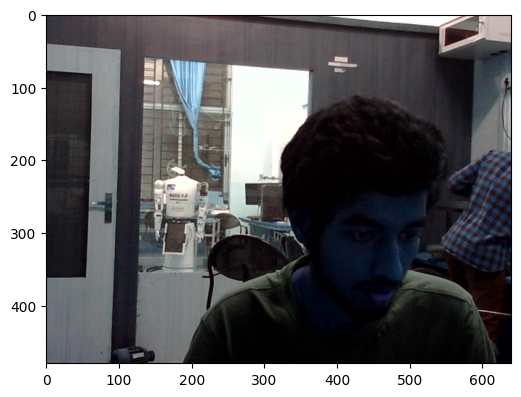

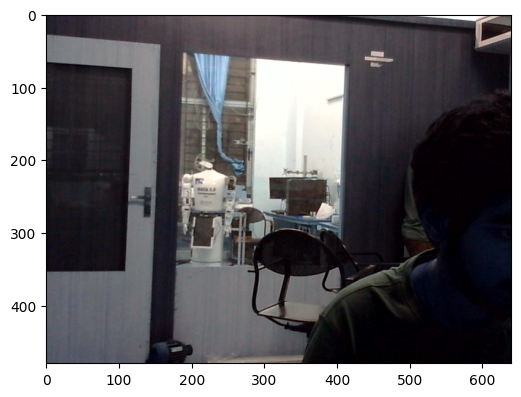

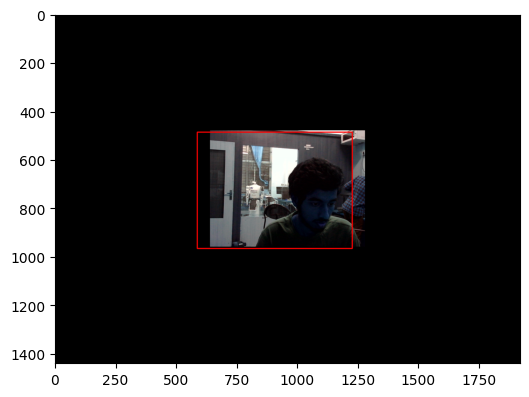

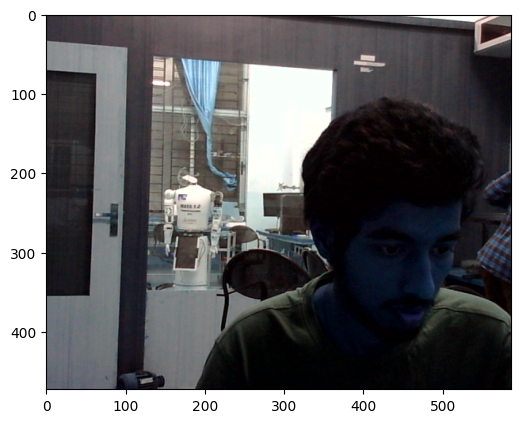

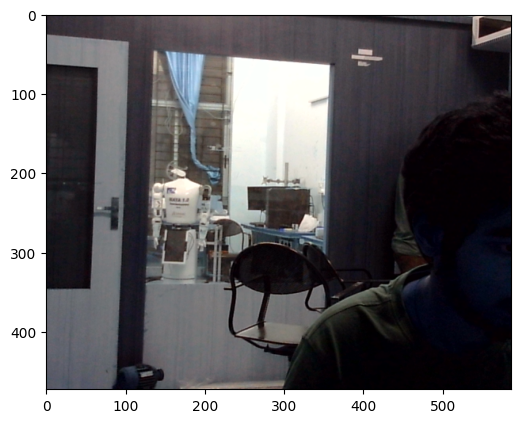

In [4]:
import cv2 
import numpy as np
import imutils

def find(full,face):
    height, width,channels = face.shape
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    m=methods[0]
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)
    top_right = (top_left[0] + width, top_left[1])
    bottom_left = (top_left[0], top_left[1] + height)
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 3)
    return (top_left[1],bottom_left[1],top_left[0],top_right[0],full_copy)

def crop(img,img1):
    x,y,z=img1.shape
    img2 = np.full((3*x,3*y,z), 0, dtype=np.uint8)
    x0=img1.shape[0]
    x1=2*img1.shape[0]
    y0=img1.shape[1]
    y1=2*img1.shape[1]
    img2[x0:x1,y0:y1,:]=img1
    p0,p1,q0,q1,img0=find(img2,img)
    display_img(img0)
    if(p0>x0):
        down=True
        a0=p0
        a1=x1
    else:
        down=False
        a1=p1
        a0=x0

    if(q0>y0):
        left=False
        b0=q0
        b1=y1
    else:
        left=True
        b1=q1
        b0=y0
    img3=img2[a0:a1,b0:b1,:]
    if(left==False and down == False):
        img4=img[img.shape[0]-img3.shape[0]:,:img3.shape[1],:]
    elif(left==False and down == True):
        img4=img[:img3.shape[0],:img3.shape[1],:]
    elif(left==True and down == False):
        img4=img[:img3.shape[0],img.shape[1]-img3.shape[1]:,:]
    elif(left==True and down == True):
        img4=img[img.shape[0]-img3.shape[0]:,img.shape[1]-img3.shape[1]:,:]
    return (img3,img4)


img  = cv2.imread('snapshot.png')
img1 = cv2.imread('snapshot1.png')

display_img(img)
display_img(img1)
img3,img4=crop(img1,img)
display_img(img3)
display_img(img4)